# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key

'e67d06ffbf1c6d98526ad6ec39522cfd'

In [4]:
# definition of weather check


url = "http://api.openweathermap.org/data/2.5/weather?"


# Build query URL

for i in range(len(cities)):
    
    query_url = url + "appid=" + api_key + "&q=" + cities[i]
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #pprint(f"The weather API responded with: {weather_json}.")
    
    if weather_json['cod'] == '404':
        continue
    else:    
        pprint(weather_json['name'])
        pprint(weather_json['main']['temp'])
        print('\n')
# Get the temperature from the response


'Albany'
271.19


'Ushuaia'
282.15


'Hobart'
290.15


'Kondinskoye'
261.819


'Avarua'
302.15


'Heihe'
247.15


'Busselton'
288.594


'Ossora'
244.469


'Ponta Delgada'
288.15


'Hithadhoo'
299.994


'Husavik'
256.419


'Caravelas'
300.169


'Saskylakh'
234.094


'Tasiilaq'
260.15


'Klaksvik'
276.15


'Cotonou'
302.15


'Kulhudhuffushi'
300.994


'Saint-Joseph'
276.59


'Aykhal'
240.219


'Karratha'
299.569


'Esperance'
301.15


'Pevek'
249.694


'Dhidhdhoo'
300.994


'Kapaa'
299.57


'Rikitea'
300.119


'Punta Arenas'
286.48


'Leningradskiy'
253.719


'Carnarvon'
291.119


'Bathsheba'
300.15


'Hermanus'
290.169


'Port Elizabeth'
275.43


'Usinsk'
264.219


'Iqaluit'
253.15


'Neubrandenburg'
279.369


'Kodiak'
273.78


'Yellowknife'
247.15


'Montepuez'
296.594


'Kathu'
295.069


'Nanortalik'
271.594


'Bluff'
295.669


'Bredasdorp'
294.15


'Jamestown'
299.844


'Komsomolskiy'
261.469


'Tutoia'
300.15


'Rawson'
304.494


'Coffs Harbour'
296.45


'Peleduy'
246.469


'Airai'


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

dictlist=[]
# Build query URL

for i in range(len(cities)):
    
    query_url = url + "appid=" + api_key + "&q=" + cities[i]
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #pprint(f"The weather API responded with: {weather_json}.")
    
    if weather_json['cod'] == '404':
        continue
    else:    
        dictlist.append(weather_json)

In [6]:
weatherdf = pd.DataFrame(dictlist)
weatherdf

weatherdf.to_csv('./Weather.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
weatherdf.head()

,base,clouds,cod,coord,dt,id,main,name,rain,snow,sys,visibility,weather,wind
0,stations,{'all': 90},200,"{'lon': -73.75, 'lat': 42.65}",1547585820,5106834,"{'temp': 271.19, 'pressure': 1019, 'humidity':...",Albany,NaN,NaN,"{'type': 1, 'id': 3273, 'message': 0.0046, 'co...",16093.0,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'speed': 2.1, 'deg': 360}"
1,stations,{'all': 75},200,"{'lon': -68.31, 'lat': -54.81}",1547586000,3833367,"{'temp': 282.15, 'pressure': 988, 'humidity': ...",Ushuaia,NaN,NaN,"{'type': 1, 'id': 8303, 'message': 0.0055, 'co...",10000.0,"[{'id': 521, 'main': 'Rain', 'description': 's...","{'speed': 12.9, 'deg': 230, 'gust': 18}"
2,stations,{'all': 75},200,"{'lon': 147.33, 'lat': -42.88}",1547586000,2163355,"{'temp': 290.15, 'pressure': 1010, 'humidity':...",Hobart,NaN,NaN,"{'type': 1, 'id': 9545, 'message': 0.0051, 'co...",10000.0,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 5.1, 'deg': 160}"
3,stations,{'all': 48},200,"{'lon': 67.41, 'lat': 59.65}",1547587231,1502697,"{'temp': 261.819, 'pressure': 1021.02, 'humidi...",Kondinskoye,NaN,NaN,"{'message': 0.003, 'country': 'RU', 'sunrise':...",NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 3.08, 'deg': 204.5}"
4,stations,{'all': 75},200,"{'lon': -159.78, 'lat': -21.21}",1547586000,4035715,"{'temp': 302.15, 'pressure': 1011, 'humidity':...",Avarua,NaN,NaN,"{'type': 1, 'id': 7271, 'message': 0.0033, 'co...",10000.0,"[{'id': 521, 'main': 'Rain', 'description': 's...","{'speed': 3.6, 'deg': 100}"


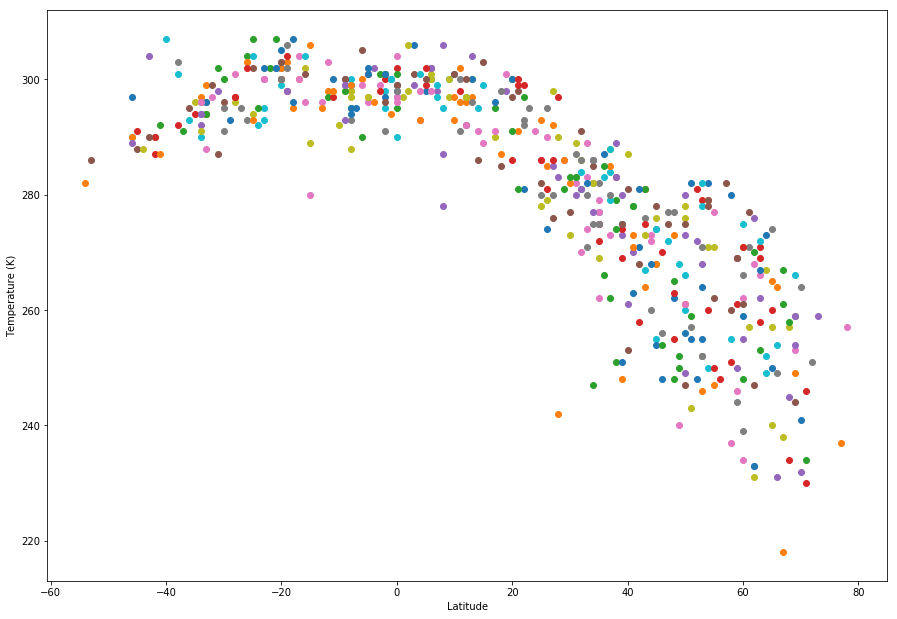

In [8]:
import matplotlib.pyplot as plt 

#note: I imported this down here because it takes so long to run the previous function. 

fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_subplot(111, aspect='equal')

ax.autoscale()

plt.ylabel('Temperature (K)')
plt.xlabel('Latitude')

for i in range(len(weatherdf)):
    plt.scatter(int(weatherdf['coord'][i]['lat']), int(weatherdf['main'][i]['temp']), linestyle='-')
    

      
    #print(weatherdf['coord'][i]['lat'], type(int(weatherdf['main'][i]['temp'])))
    #plt.plot(int(weatherdf['coord'][i]['lat']), int(weatherdf['main'][i]['temp']))
    
    
#There is an obvious relationship here between latitude and temperature. As we go farther from the equator,
#temperature goes down. We can see how the majority of human cities tend to be in the northern hemisphere,
#as well (because that is where most of the land is).

#### Latitude vs. Humidity Plot

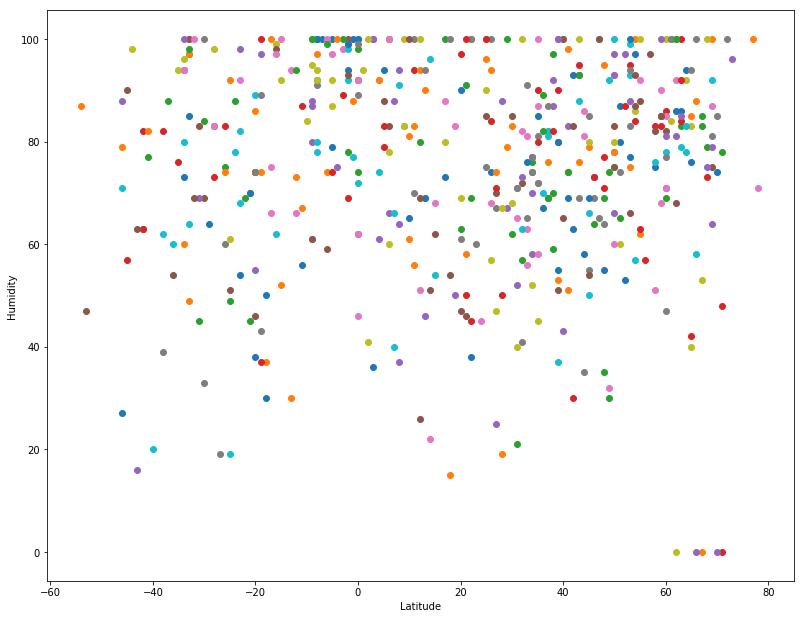

In [9]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_subplot(111, aspect='equal')

ax.autoscale()

plt.ylabel('Humidity')
plt.xlabel('Latitude')

for i in range(len(weatherdf)):
    plt.scatter(int(weatherdf['coord'][i]['lat']), int(weatherdf['main'][i]['humidity']), linestyle='-')


In [10]:

#Note 2: I realize that due to the random nature of rerolling cities, the following code isn't necessary anymore.
#However, the first time through, the city "Lamas" was #395. It had an incorrect humidity reading of 290. 
#The below code was to correct for this, although it has been made unnecessary.
#I have left this in out of laziness, and to flag the incorrect humidity reading from the city of Lamas.

#Note: the following is to identify this outlier, and remove it if it is potentially incorrect.



for i in range(len(weatherdf)):
    if int(weatherdf['main'][i]['humidity'])>150:
        print(weatherdf['name'][i], i)
        
#I saw from the "i" in the function call that this data point is row 395. Then I use the following code
#to check it out further.
        
lamas = pd.DataFrame(weatherdf.iloc[395])       

lamas = lamas.T

pprint(dict(lamas['main']))

#It is possible that this temp min and temp max are being conflated with humidity somehow. 
#Regardless of the reason, I looked it up and even with supersaturation, humidity can't get higher than
#a few percent above 100%. I decided to remove this datapoint from the graph.



{395: {'humidity': 61,
       'pressure': 1015,
       'temp': 300.15,
       'temp_max': 300.15,
       'temp_min': 300.15}}


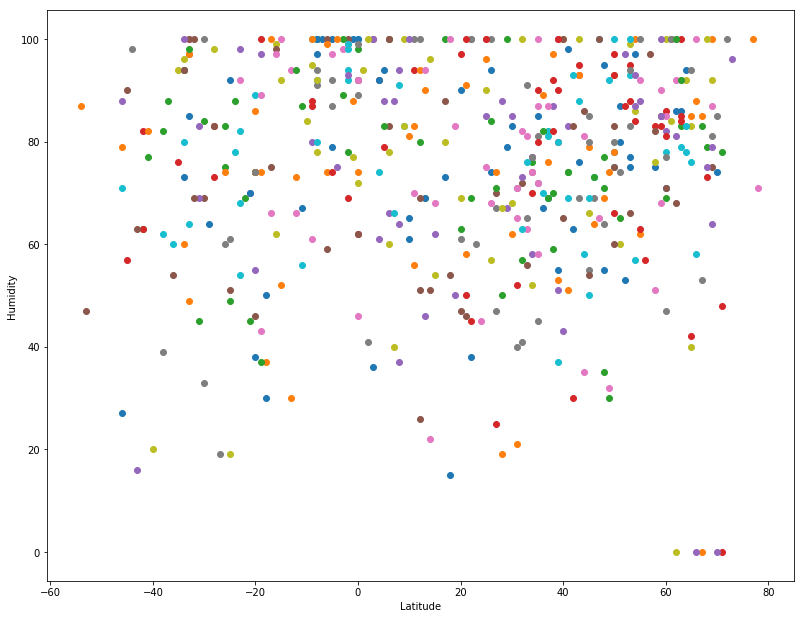

In [11]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_subplot(111, aspect='equal')

ax.autoscale()

plt.ylabel('Humidity')
plt.xlabel('Latitude')

for i in range(len(weatherdf)):
    if i ==395:
        continue
    else:
        plt.scatter(int(weatherdf['coord'][i]['lat']), int(weatherdf['main'][i]['humidity']), linestyle='-')


#### Latitude vs. Cloudiness Plot

In [18]:
weatherdf.head()


,base,clouds,cod,coord,dt,id,main,name,rain,snow,sys,visibility,weather,wind
0,stations,{'all': 90},200,"{'lon': -73.75, 'lat': 42.65}",1547585820,5106834,"{'temp': 271.19, 'pressure': 1019, 'humidity':...",Albany,NaN,NaN,"{'type': 1, 'id': 3273, 'message': 0.0046, 'co...",16093.0,"[{'id': 804, 'main': 'Clouds', 'description': ...","{'speed': 2.1, 'deg': 360}"
1,stations,{'all': 75},200,"{'lon': -68.31, 'lat': -54.81}",1547586000,3833367,"{'temp': 282.15, 'pressure': 988, 'humidity': ...",Ushuaia,NaN,NaN,"{'type': 1, 'id': 8303, 'message': 0.0055, 'co...",10000.0,"[{'id': 521, 'main': 'Rain', 'description': 's...","{'speed': 12.9, 'deg': 230, 'gust': 18}"
2,stations,{'all': 75},200,"{'lon': 147.33, 'lat': -42.88}",1547586000,2163355,"{'temp': 290.15, 'pressure': 1010, 'humidity':...",Hobart,NaN,NaN,"{'type': 1, 'id': 9545, 'message': 0.0051, 'co...",10000.0,"[{'id': 803, 'main': 'Clouds', 'description': ...","{'speed': 5.1, 'deg': 160}"
3,stations,{'all': 48},200,"{'lon': 67.41, 'lat': 59.65}",1547587231,1502697,"{'temp': 261.819, 'pressure': 1021.02, 'humidi...",Kondinskoye,NaN,NaN,"{'message': 0.003, 'country': 'RU', 'sunrise':...",NaN,"[{'id': 802, 'main': 'Clouds', 'description': ...","{'speed': 3.08, 'deg': 204.5}"
4,stations,{'all': 75},200,"{'lon': -159.78, 'lat': -21.21}",1547586000,4035715,"{'temp': 302.15, 'pressure': 1011, 'humidity':...",Avarua,NaN,NaN,"{'type': 1, 'id': 7271, 'message': 0.0033, 'co...",10000.0,"[{'id': 521, 'main': 'Rain', 'description': 's...","{'speed': 3.6, 'deg': 100}"


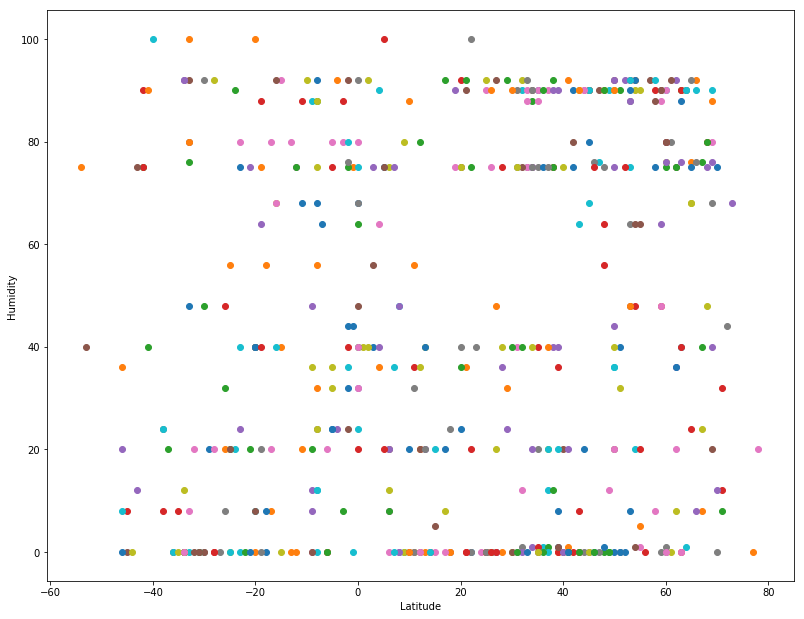

In [19]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_subplot(111, aspect='equal')

ax.autoscale()

plt.ylabel('Cloudiness')
plt.xlabel('Latitude')

for i in range(len(weatherdf)):
    plt.scatter(int(weatherdf['coord'][i]['lat']), int(weatherdf['clouds'][i]['all']), linestyle='-')

    
#We don't see a clear relationship here between latitude and cloudiness.    

#### Latitude vs. Wind Speed Plot

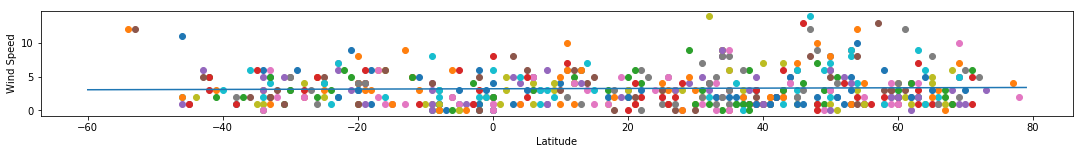

In [44]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_subplot(111, aspect='equal')


plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

latwindlist=[]

for i in range(len(weatherdf)):
    plt.scatter(int(weatherdf['coord'][i]['lat']), int(weatherdf['wind'][i]['speed']), linestyle='-')
    latlist.append(int(weatherdf['coord'][i]['lat']))
    windlist.append(int(weatherdf['wind'][i]['speed']))
    
# I couldn't tell if there was a relationship in the graph. 

from sklearn.linear_model import LinearRegression

x = np.array(latlist).reshape(-1,1)
y = np.array(windlist)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(x,y)


x_new= np.arange(-60, 80)
y_new= linear_regressor.predict(x_new[:, np.newaxis])
ax.plot(x_new, y_new)


#It looks like there is a slight positive relationship.